C:\Users\Wika\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
Metric: chebyshev: 100%|██████████| 23/23 [48:10<00:00, 125.65s/it]


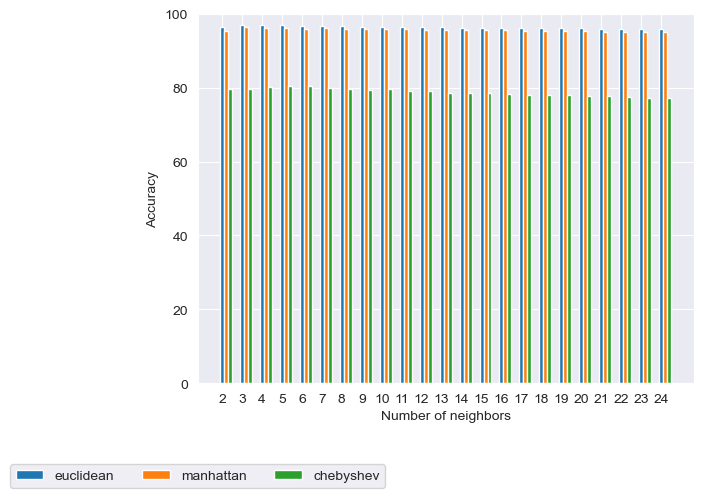

Best accuracy: 0.9697619047619047
Metric with best accuracy: euclidean
Number of neighbors with best accuracy: 3


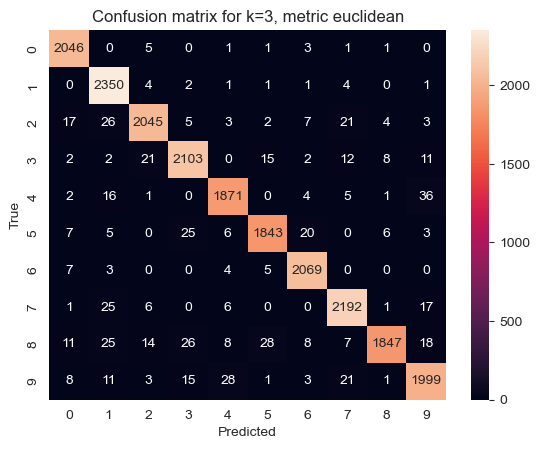

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from tqdm import tqdm
import numpy as np
import csv

mnist = fetch_openml('mnist_784')

X = mnist.data.astype('float32')
y = mnist.target.astype('int64')

# normalizacja
X /= 255.0

# Podział
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

metrics = ['euclidean', 'manhattan','chebyshev']
k_values = list(range(2,25))

results = {metric: [] for metric in metrics}

#najlepsze
best_accuracy = 0
best_metric = ''
best_k = 0

for metric in metrics:
    accuracy_scores = []
    for k in tqdm(k_values, desc="Metric: {}".format(metric)):
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy * 100)
        # najlepsze
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_metric = metric
            best_k = k

    with open('results.csv', mode='a', newline='') as results_file:
        results_writer = csv.writer(results_file, delimiter=',',quotechar='"', quoting=csv.QUOTE_MINIMAL)
        results_writer.writerow(['Metric', metric])
        results_writer.writerow(['Number of neighbors', 'Accuracy'])
        for k, acc in zip(k_values, accuracy_scores):
            results_writer.writerow([k, acc])


    # Tworzenie słupków dla każdej metryki
    x = np.arange(len(k_values))
    plt.bar(x + (metrics.index(metric) * 0.2), accuracy_scores, width=0.2, label=metric)

# wykres
plt.ylim(0, 100)
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.xticks(x, k_values)
plt.legend(loc='upper center', bbox_to_anchor=(0, -0.2), ncol=3)

plt.show()

# wyswietlenie najlepszych parametrów
print("Best accuracy:", best_accuracy)
print("Metric with best accuracy:", best_metric)
print("Number of neighbors with best accuracy:", best_k)

# macierz pomyłek dla najlepszego k
knn = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion matrix for k={}, metric {}".format(best_k, best_metric))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()